In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('datasets/police-department-calls-for-service.csv')
#df.head()
#df.tail()


In [24]:
df.index


RangeIndex(start=0, stop=2132591, step=1)

In [25]:
df.columns
df.values

Index(['Crime Id', 'Original Crime Type Name', 'Report Date', 'Call Date',
       'Offense Date', 'Call Time', 'Call Date Time', 'Disposition', 'Address',
       'City', 'State', 'Agency Id', 'Address Type', 'Common Location'],
      dtype='object')

array([[160942891, 'Muni Inspection', '2016-04-03T00:00:00', ..., 1,
        'Common Location', 'West Portal Muni, Sf'],
       [160930487, '913', '2016-04-02T00:00:00', ..., 1, 'Intersection',
        nan],
       [160941602, 'Passing Call', '2016-04-03T00:00:00', ..., 1,
        'Common Location', 'Fishermans Wharf, Sf'],
       ...,
       [182984386, 'Passing Call', '2018-10-25T00:00:00', ..., 1,
        'Common Location', 'Gg Park Tennis Courts'],
       [182984388, 'Passing Call', '2018-10-25T00:00:00', ..., 1,
        'Geo-Override', nan],
       [182984396, 'Auto Boost / Strip', '2018-10-25T00:00:00', ..., 1,
        'Intersection', nan]], dtype=object)

In [2]:

dfi = pd.read_csv('datasets/police-department-incidents.csv')
#dfi.head()
#dfi.tail()


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#responses = pd.read_csv("freeformResponses.csv")
df_responses = pd.read_csv("multipleChoiceResponses.csv",encoding='ISO-8859-1')

#multipleChoiceResponses
df_responses.head()

C:\Users\ghami\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_responses.isnull().sum()

GenderSelect                                  95
Country                                      121
Age                                          331
EmploymentStatus                               0
StudentStatus                              15436
LearningDataScience                        15432
CodeWriter                                  3530
CareerSwitcher                             13704
CurrentJobTitleSelect                       4886
TitleFit                                    5212
CurrentEmployerType                         5115
MLToolNextYearSelect                        5718
MLMethodNextYearSelect                      5883
LanguageRecommendationSelect                5718
PublicDatasetsSelect                        5920
LearningPlatformSelect                      5445
LearningPlatformUsefulnessArxiv            14325
LearningPlatformUsefulnessBlogs            11951
LearningPlatformUsefulnessCollege          13357
LearningPlatformUsefulnessCompany          15735
LearningPlatformUsef

In [32]:
df_responses.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [5]:
df_responses.shape

(16716, 228)

In [5]:

total=df_responses.isnull().sum().sort_values(ascending=False)
percent=df_responses.isnull().sum()/df_responses.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1, keys=['Total','Percent'],sort=True)
missing_data.Percent.sort_values().head(20)

EmploymentStatus                 0.000000
GenderSelect                     0.005683
Country                          0.007239
Age                              0.019801
FormalEducation                  0.101759
FirstTrainingSelect              0.119885
PastJobTitlesSelect              0.150993
Tenure                           0.190476
MajorSelect                      0.205492
CodeWriter                       0.211175
LearningCategoryKaggle           0.214764
LearningCategoryOnlineCourses    0.214764
LearningCategoryUniversity       0.215004
LearningCategoryWork             0.215662
LearningCategorySelftTaught      0.215781
LearningCategoryOther            0.216679
MLSkillsSelect                   0.237078
DataScienceIdentitySelect        0.241984
ParentsEducation                 0.242163
MLTechniquesSelect               0.247188
Name: Percent, dtype: float64

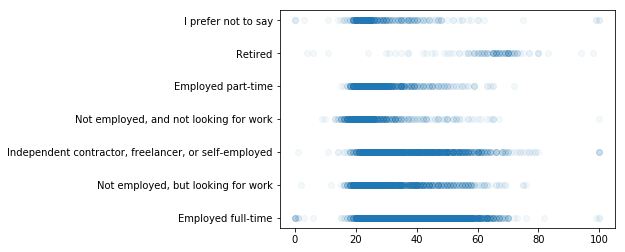

In [6]:
plt.scatter( df_responses.Age, df_responses.EmploymentStatus,alpha=0.05)


In [7]:
#plt.scatter( df_responses.GenderSelect, df_responses.LearningDataScience,alpha=0.05)
#df_responses.GenderSelect
#crosstab(titanic_df.Survived,titanic_df.Sex,normalize=True, margins=True)
Employed_By_Gender = pd.crosstab(df_responses.EmploymentStatus,df_responses.GenderSelect,normalize=True, margins=True)
Employed_By_Gender
Employed_By_Gender/Employed_By_Gender.loc['All']


GenderSelect,A different identity,Female,Male,"Non-binary, genderqueer, or gender non-conforming",All
EmploymentStatus,,,,,
Employed full-time,0.597484,0.590713,0.666716,0.581081,0.652969
Employed part-time,0.062893,0.080634,0.049522,0.027027,0.054750
I prefer not to say,0.094340,0.032397,0.021602,0.067568,0.024307
"Independent contractor, freelancer, or self-employed",0.088050,0.059395,0.083101,0.148649,0.079478
"Not employed, and not looking for work",0.069182,0.068395,0.052461,0.054054,0.055291
"Not employed, but looking for work",0.050314,0.165947,0.119251,0.081081,0.126226
Retired,0.037736,0.002520,0.007348,0.040541,0.006979
All,1.000000,1.000000,1.000000,1.000000,1.000000


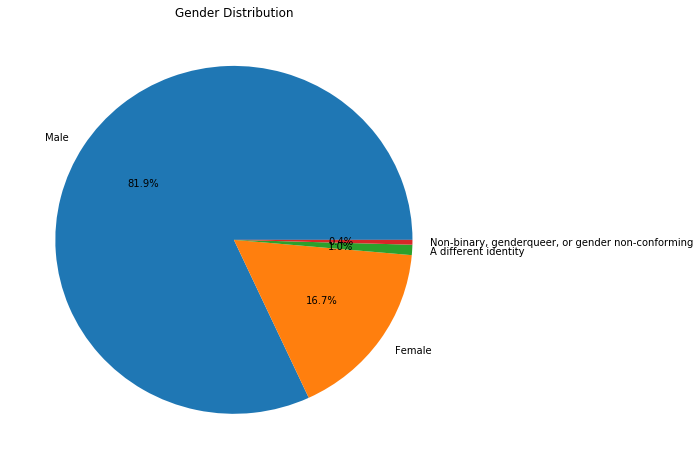

Proportion of women in this survey: 16.71% 
Proportion of men in this survey: 81.88% 


In [8]:

plt.figure(figsize=(8,8))
gender=df_responses['GenderSelect'].value_counts()
plt.pie(gender,labels=gender.index,autopct='%.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
plt.title('Gender Distribution')

plt.show()
print('Proportion of women in this survey: {:0.2f}% '.format(100*len(df_responses[df_responses['GenderSelect']=='Female'])/len(df_responses['GenderSelect'].dropna())))
print('Proportion of men in this survey: {:0.2f}% '.format(100*len(df_responses[df_responses['GenderSelect']=='Male'])/len(df_responses['GenderSelect'].dropna())))

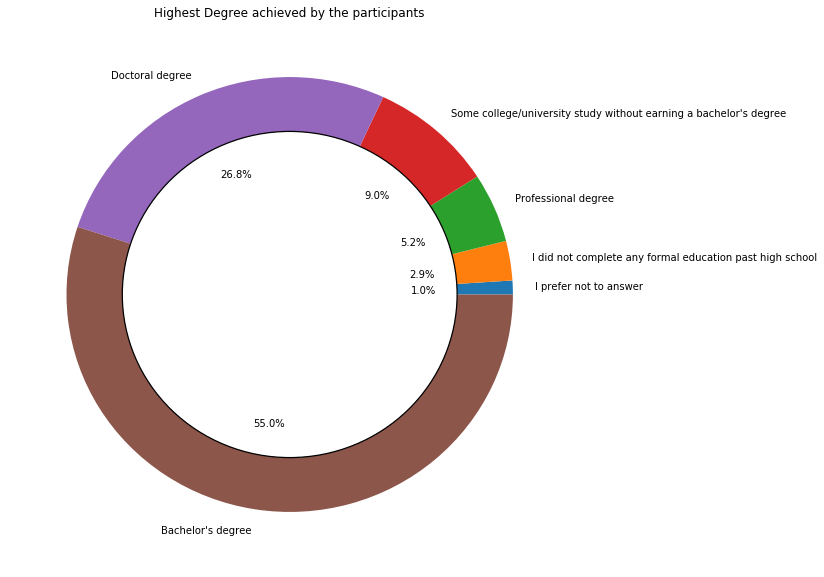

In [9]:

education=df_responses['FormalEducation'].value_counts().sort_values()[:6]
plt.figure(figsize=(10,10))
plt.pie(x=education,labels=education.index,autopct='%.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Highest Degree achieved by the participants')
plt.show()

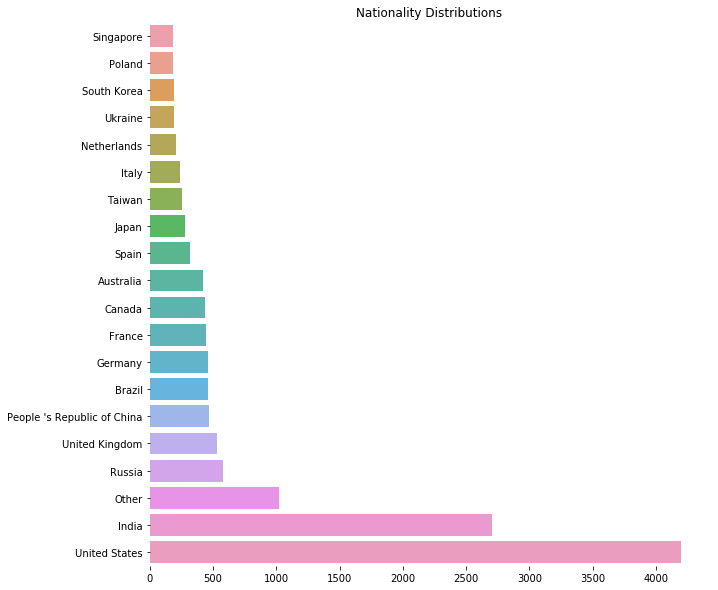

25.11% of the instances are Americans
16.18% of the instances are Indians
31.10% of the instances are contributed by top 5 countries


In [10]:
import seaborn as sns
country=df_responses['Country'].value_counts().sort_values().tail(20)
plt.figure(figsize=(10,10))
sns.barplot(y=country.index, x=country.values,alpha=0.9)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Nationality Distributions')
plt.show();
top_5=0
for i in [1,2,4,5,6]:
    top_5=top_5+country.sort_values(ascending=False)[i]
top_5=100*(top_5/len(df_responses))
print('{:0.2f}% of the instances are Americans'.format(100*len(df_responses[df_responses['Country']=='United States'])/len(df_responses)))
print('{:0.2f}% of the instances are Indians'.format(100*len(df_responses[df_responses['Country']=='India'])/len(df_responses)))
print('{:0.2f}% of the instances are contributed by top 5 countries'.format(top_5))

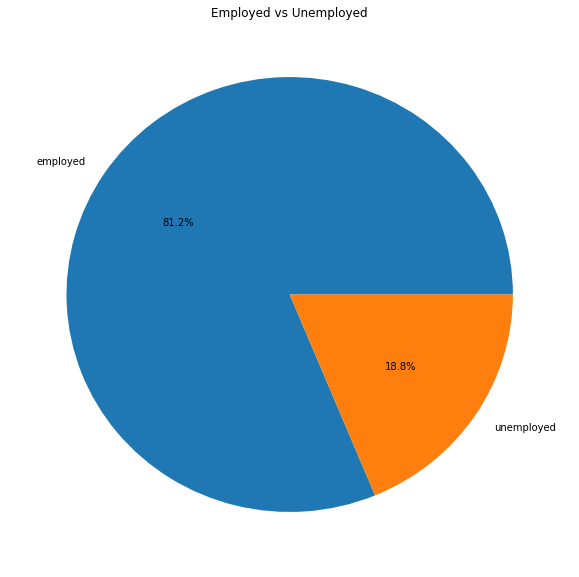

In [11]:

employment=df_responses['EmploymentStatus'].value_counts()
employment_df=pd.DataFrame(employment)
n_employed= employment[0]+employment[2]+employment[4]
n_unemployed=employment[1]+employment[3]
x=[n_employed,n_unemployed]
plt.figure(figsize=(10,10))
plt.pie(x=x,labels=['employed','unemployed'],autopct='%1.1f%%')
plt.title("Employed vs Unemployed")
plt.show();

In [12]:

employment=df_responses['EmploymentStatus'].value_counts()
employment_df=pd.DataFrame(employment)
employment_df

,EmploymentStatus
Employed full-time,10897
"Not employed, but looking for work",2110
"Independent contractor, freelancer, or self-employed",1330
"Not employed, and not looking for work",924
Employed part-time,917
I prefer not to say,420
Retired,118


In [49]:

total=df_responses.isnull().sum().sort_values(ascending=False)
percent=df_responses.isnull().sum()/df_responses.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1, keys=['Total','Percent'],sort=True)
missing_data.Percent.sort_values().head(20)

EmploymentStatus                 0.000000
GenderSelect                     0.005683
Country                          0.007239
Age                              0.019801
FormalEducation                  0.101759
FirstTrainingSelect              0.119885
PastJobTitlesSelect              0.150993
Tenure                           0.190476
MajorSelect                      0.205492
CodeWriter                       0.211175
LearningCategoryKaggle           0.214764
LearningCategoryOnlineCourses    0.214764
LearningCategoryUniversity       0.215004
LearningCategoryWork             0.215662
LearningCategorySelftTaught      0.215781
LearningCategoryOther            0.216679
MLSkillsSelect                   0.237078
DataScienceIdentitySelect        0.241984
ParentsEducation                 0.242163
MLTechniquesSelect               0.247188
Name: Percent, dtype: float64

In [42]:
missing_data.Percent1=0
missing_data.Percent1=missing_data.Percent<0.15
missing_data.Percent1

Age                                       False
AlgorithmUnderstandingLevel                True
BlogsPodcastsNewslettersSelect             True
CareerSwitcher                             True
CodeWriter                                 True
CompensationAmount                         True
CompensationCurrency                       True
Country                                   False
CoursePlatformSelect                       True
CurrentEmployerType                        True
CurrentJobTitleSelect                      True
DataScienceIdentitySelect                  True
EmployerIndustry                           True
EmployerMLTime                             True
EmployerSearchMethod                       True
EmployerSize                               True
EmployerSizeChange                         True
EmploymentStatus                          False
FirstTrainingSelect                       False
FormalEducation                           False
GenderSelect                            